# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## BRCA


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_BRCA.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">June 17th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > BRCA
    
**Dependent files:**

* Target (Cancer) data: 
    - *BRCA_Interface.txt*

In [1]:
from pathlib import Path

from helpers.helpers_predator.displayers import (
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.common import load_predator

# PATHS
BRCA_PATH = Path(r"../data/Elaspic_merged_results/BRCA_Interface_2021-11-17.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2022-06-16/cc84a54e/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2022-06-16 23:48:06 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2022-06-16\cc84a54e\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: BRCA

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('brca', BRCA_PATH)]
)

2022-06-16 23:48:06 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `brca` ..
2022-06-16 23:48:06 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_brca_data` ..
2022-06-16 23:48:06 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-16 23:48:06 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-16 23:48:06 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_brca data materials  ..


#### TCGA Cancer Datasets

##### BRCA

In [5]:
display_data(predator.data_materials["brca"])

Data dimensions: (7739, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P28062,P28062,R216W,done,interface,COSM451277,-,-,Proteasome,Proteasome,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,IRK,...,684.0,131.720,131.479,129.5260,129.5260,None,None,None,2.48410,2.92169
2,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,IRK,...,678.0,142.706,142.107,99.1151,99.1190,None,624.35,None,2.70474,3.18529


#### Preprocessed TCGA Cancer Datasets

##### BRCA

In [6]:
display_data(predator.data_materials["target_brca_data"])

Data dimensions: (7739, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P28062,R216W,P40306,0.2406,0.246427,0.8858,0.823800,0.789252,0.441485,0.077736,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,Q15842,E237K,Q14654,0.4663,0.441520,0.4623,0.472829,2.112660,0.986541,0.235649,...,684.0,131.720,131.479,129.5260,129.5260,0.000,0.000,0.00,2.48410,2.92169
2,Q15842,E237K,P63252,0.4663,0.441520,0.5380,0.535672,2.342750,0.990924,0.130527,...,678.0,142.706,142.107,99.1151,99.1190,0.000,624.350,0.00,2.70474,3.18529


### Voting mode: `soft`

In [7]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('brca', BRCA_PATH)]
)

2022-06-16 23:48:48 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `brca` ..
2022-06-16 23:48:48 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_brca_data` ..
2022-06-16 23:48:48 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-16 23:48:48 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-16 23:48:48 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_brca data materials  ..


In [8]:
predator.predict(voting='soft')

2022-06-16 23:48:49 | DEBUG    | Predator | Predicting on cancer datasets ..
2022-06-16 23:48:49 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2022-06-16 23:48:49 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2022-06-16 23:48:49 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2022-06-16 23:48:49 | DEBUG    | Predator | Predicting on brca cohort ..
2022-06-16 23:48:49 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=380, random_state=3279)
2022-06-16 23:48:49 | DEBUG    | helpers.helpers_predator.models | X shape: (7739, 10)
2022-06-16 23:48:49 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=90,
                  

In [10]:
predator.predictions.keys()

dict_keys(['brca_prob'])

In [11]:
# Predictions for first 10 experiment.
predator.predictions["brca_prob"][:3]

[array([[0.56921656, 0.43078344],
        [0.48701068, 0.51298932],
        [0.42720256, 0.57279744],
        ...,
        [0.22356499, 0.77643501],
        [0.30428615, 0.69571385],
        [0.5646724 , 0.4353276 ]]),
 array([[0.55699941, 0.44300059],
        [0.51957208, 0.48042792],
        [0.50828327, 0.49171673],
        ...,
        [0.47296087, 0.52703913],
        [0.46396142, 0.53603858],
        [0.60691076, 0.39308924]]),
 array([[0.71307607, 0.28692393],
        [0.39149025, 0.60850975],
        [0.34500591, 0.65499409],
        ...,
        [0.39701242, 0.60298758],
        [0.37905016, 0.62094984],
        [0.45422164, 0.54577836]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [ ]:
predator.predictions_post_process()

2022-06-16 23:49:29 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-16 23:49:29 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort brca ..
2022-06-16 23:49:29 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-16 23:49:29 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with brca cancer dataset ..
2022-06-16 23:49:30 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-16 23:49:55 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 958): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.496308  Q9UKS6     R24H     Q9UNF0
1    0.639737  Q9UKS6     R24H     Q9UNF0
2    0.456049  Q9UL54    V301M     P46734
3    0.456049  Q9UL54    V301M     P46734
4    0.586027  Q9UL54    V301M     P46734
2022-06-16 23:50:21 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 793): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.447326  Q9UKS6     R24H     Q9UNF0
1    0.523560  Q9UKS6     R24H     Q9UNF0
2    0.468492  Q9Y616    F419L     Q16288
3    0.641386  Q9Y616    F419L     Q16288
4    0.527046  P04637    R280K     Q13625
2022-06-16 23:50:47 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1085): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.517861  P04637    R280K     Q13625
1    0.237551  P04637    R280K     Q13625
2    0

In [13]:
predator.predictions.keys()

dict_keys(['brca_prob', 'brca_predicted_probs_datasets', 'brca_predicted_valid_datasets', 'brca_predicted_invalid_datasets', 'brca_finalized_prediction_dataframes'])

In [14]:
display_data(predator.predictions["brca_predicted_probs_datasets"][0])

Data dimensions: (7739, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.430783,P28062,P28062,R216W,done,interface,COSM451277,-,-,Proteasome,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,0.512989,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,...,684.0,131.720,131.479,129.5260,129.5260,None,None,None,2.48410,2.92169
2,0.572797,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,...,678.0,142.706,142.107,99.1151,99.1190,None,624.35,None,2.70474,3.18529


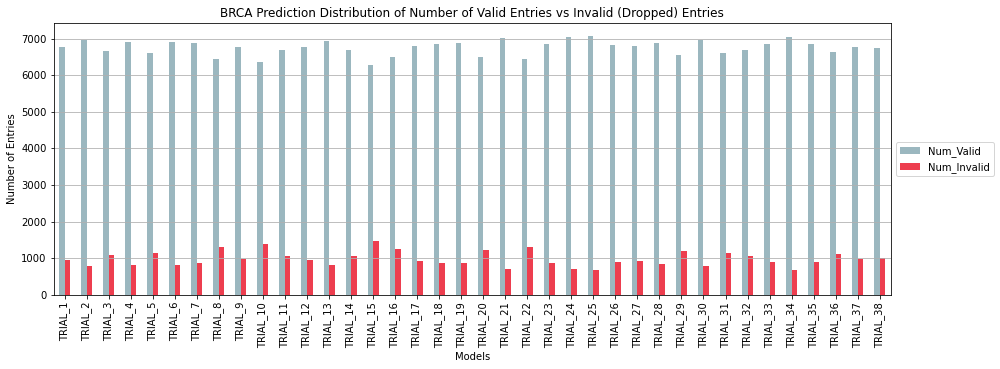

In [15]:
predator.predictions.plot_distribution_valid_vs_invalid("brca")

2022-06-17 00:07:01 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


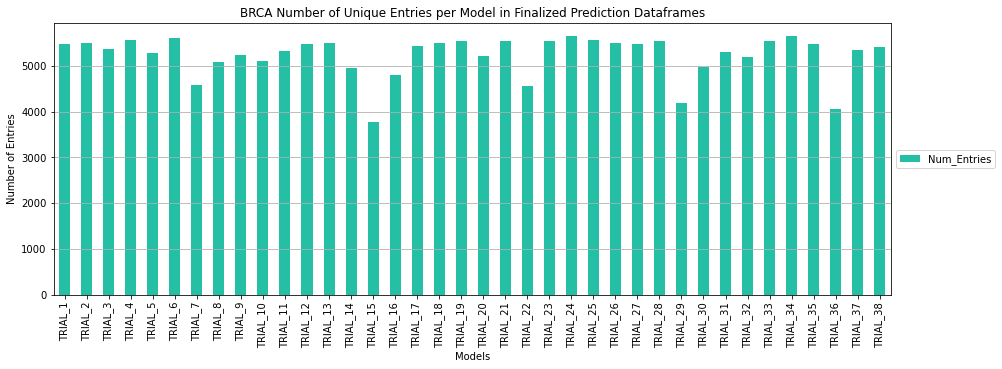

In [16]:
predator.predictions.plot_num_finalized_predictions("brca")

In [18]:
display_data(predator.predictions['brca_finalized_prediction_dataframes'][0])

Data dimensions: (5478, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.430783,P28062,R216W,P40306
1,0.512989,Q15842,E237K,Q14654
2,0.572797,Q15842,E237K,P63252


In [19]:
predator.prepare_ensemble_prediction_data()

2022-06-17 00:09:42 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 00:09:42 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for brca taking median ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-17 00:16:21 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for brca is prepared.
Accessible from `brca_predictions_prob_data`.
2022-06-17 00:16:21 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for brca is prepared.
Accessible from `brca_ensemble_prediction_data`.
2022-06-17 00:16:21 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for brca.
Accessible from predictions.['brca_prediction_results']
2022-06-17 00:16:21 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for brca.
Accessible from predictions.['brca_prediction_results_no_votes_dropped']


In [20]:
display_data(predator.predictions['brca_predictions_prob_data'])

Data dimensions: (4137, 40)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,Trial 37,PROB_1s_AVG,VOTED_PREDICTION
0,0.430783,0.443001,0.286924,0.405998,0.284554,0.558161,0.498973,0.314641,0.463931,0.21614,...,0.227378,0.186754,0.39327,0.505561,0.377275,0.285714,0.527853,0.370047,0.40648,0
1,0.512989,0.480428,0.60851,0.476174,0.409859,0.611537,0.214006,0.639077,0.472304,0.643183,...,0.710501,0.349365,0.609108,0.515441,0.602519,0.94375,0.523123,0.431175,0.52114,1
2,0.572797,0.491717,0.654994,0.545428,0.460182,0.659721,0.214006,0.659077,0.501264,0.664389,...,0.722456,0.335987,0.625262,0.5625,0.613796,0.94375,0.548228,0.453255,0.57654,1


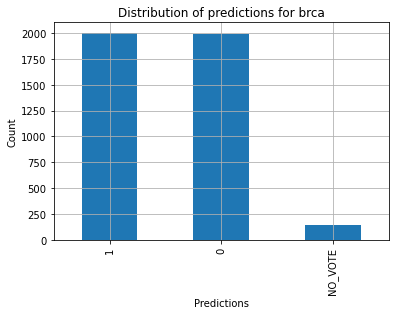

In [21]:
predator.predictions.plot_ensemble_prediction_distribution("brca")

In [22]:
brca_prediction_results_soft = predator.predictions['brca_prediction_results']
display_data(brca_prediction_results_soft)

Data dimensions: (4137, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P28062,R216W,P40306,0
1,Q15842,E237K,Q14654,1
2,Q15842,E237K,P63252,1


In [23]:
brca_prediction_results_soft_no_votes_dropped = predator.predictions["brca_prediction_results_no_votes_dropped"]
display_data(brca_prediction_results_soft_no_votes_dropped)

Data dimensions: (3991, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P28062,R216W,P40306,0
1,Q15842,E237K,Q14654,1
2,Q15842,E237K,P63252,1


Label counts:
Increasing + No Effect    1987
Disrupting                2004
Name: Prediction, dtype: int64


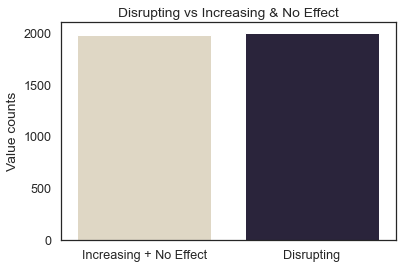

In [24]:
visualize_label_counts(brca_prediction_results_soft_no_votes_dropped, 'Prediction')

In [25]:
brca_ensemble_prediction_data_soft = predator.predictions["brca_ensemble_prediction_data"]

In [26]:
brca_predictions_prob_data_soft = predator.predictions["brca_predictions_prob_data"]

In [27]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [28]:
brca_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["brca_prediction_results"],
    predictions_prob_data=predator.predictions["brca_predictions_prob_data"]
)
brca_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P28062,R216W,P40306,0,0.40648
1,Q15842,E237K,Q14654,1,0.52114
2,Q15842,E237K,P63252,1,0.57654
3,Q9UKS6,R24H,Q9BY11,1,0.5271
4,Q9UKS6,R24H,Q9UNF0,1,0.61854


In [29]:
brca_prediction_results_soft_no_votes_dropped_with_median_probabilities = brca_prediction_results_soft_with_median_probs[
    brca_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [30]:
len(brca_prediction_results_soft_no_votes_dropped_with_median_probabilities)

3991

## Exporting Predictions

In [31]:
# brca_prediction_results = brca_prediction_results_hard_no_votes_dropped
# brca_prediction_results = brca_prediction_results_soft_no_votes_dropped
brca_prediction_results = brca_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(brca_prediction_results)

Data dimensions: (3991, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P28062,R216W,P40306,0,0.40648
1,Q15842,E237K,Q14654,1,0.52114
2,Q15842,E237K,P63252,1,0.57654


In [32]:
predator.export_prediction(
    tcga="brca",
    data=brca_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2022-06-17 00:22:02 | DEBUG    | helpers.helpers_predator.common | Folder with ID ed35a3a3 is created.
2022-06-17 00:22:02 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder brca_prediction_2022-06-17\ed35a3a3..
2022-06-17 00:22:03 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/brca_prediction_2022-06-17\ed35a3a3\predictions_soft_2022-06-17.csv is exported successfully.
2022-06-17 00:22:03 | INFO     | helpers.helpers_predator.common | Config is exported.


---